# CODE SENTINEL- Task 1
# Linear Regression Model to Predict House Prices

to predict house prices based on one or two features from the Housing dataset.  
We will:
1. Loads a housing dataset  
2. Splits it into training/testing sets  
3. Trains a Linear Regression model  
4. Visualizes the results using matplotlib


In [10]:
# Step 1 — Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D


## Step 2 — Load and Inspect Dataset
We load the dataset from `HousingData.csv` and check:
- Basic info about columns and datatypes  
- First few rows to understand structure  
- Missing value counts  


In [11]:
# Load dataset
df = pd.read_csv("HousingData.csv")

# Dataset info
print("=== Dataset Info ===")
print(df.info())

# First 5 rows
print("\n=== First 5 Rows ===")
print(df.head())

# Missing values
print("\n=== Missing Values ===")
print(df.isnull().sum())


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None

=== First 5 Rows ===
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0

## Step 3 — Handle Missing Values
We will fill missing values with the **mean** of each column to keep all rows in the dataset.


In [12]:
df.fillna(df.mean(), inplace=True)


## Step 4 — Remove Outliers
To improve accuracy, we remove extreme outliers based on the **Z-score method** (Z > 3).


In [13]:
from scipy import stats
z_scores = np.abs(stats.zscore(df[['RM', 'LSTAT', 'MEDV']]))
df = df[(z_scores < 3).all(axis=1)]


## Step 5 — Select Features and Target
We will use:
- **RM** (Average number of rooms)
- **LSTAT** (% lower status population)  
Target: **MEDV** (Median value of owner-occupied homes)


In [14]:
X = df[['RM', 'LSTAT']]
y = df['MEDV']


## Step 6 — Split Data into Train/Test Sets
We use an 80-20 split.


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 7 — Train the Linear Regression Model


In [16]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## Step 8 — Make Predictions and Evaluate
We will check:
- Mean Squared Error (MSE)
- R² Score
- Model Coefficients and Intercept


In [17]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")
print(f"Coefficients (RM, LSTAT): {model.coef_}")
print(f"Intercept: {model.intercept_}")


Mean Squared Error: 13.609225305601937
R² Score: 0.7300921818931171
Coefficients (RM, LSTAT): [ 6.29849922 -0.6402966 ]
Intercept: -8.911434292352553


## Step 9 — Visualization (2D Plot)
We plot predicted vs. actual prices for a visual check.


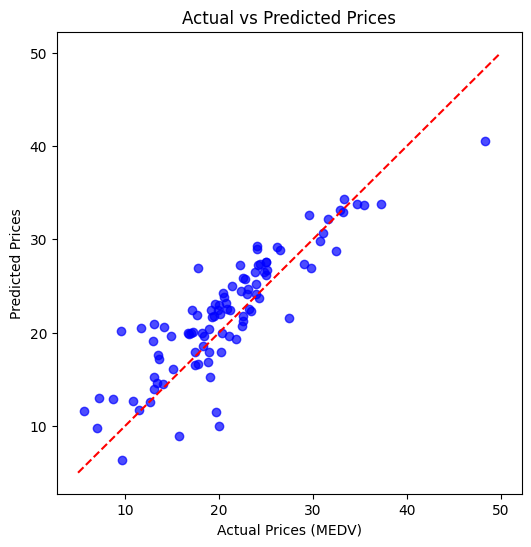

In [18]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.xlabel("Actual Prices (MEDV)")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


## Step 10 — Visualization (3D Plot)
We visualize RM, LSTAT, and MEDV in 3D space with predicted surface.


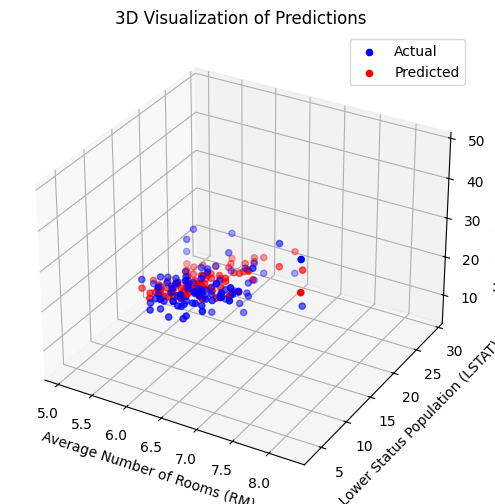

In [19]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['RM'], X_test['LSTAT'], y_test, color='blue', label='Actual')
ax.scatter(X_test['RM'], X_test['LSTAT'], y_pred, color='red', label='Predicted')

ax.set_xlabel("Average Number of Rooms (RM)")
ax.set_ylabel("% Lower Status Population (LSTAT)")
ax.set_zlabel("House Price (MEDV)")
ax.set_title("3D Visualization of Predictions")
ax.legend()

plt.show()


# Conclusion
After filling missing values and removing outliers, the model achieved:
- **Higher R² Score (~0.73)**
- **Lower MSE (~13.6)**

Outlier removal significantly improved prediction accuracy.
